In [1]:
import acgan
import tensorflow as tf
session = tf.InteractiveSession()

In [2]:
dataset = acgan.data.load_cifar10(50);
iter_x = dataset.make_one_shot_iterator()
x_real = iter_x.get_next()

Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


In [3]:
import twodlearn as tdl
import twodlearn.debug

@tdl.debug.stop_at_error
def test():
    results = acgan.evaluate.inception_score.inception_score(x_real, scale=False, max_eval=1000)
    return results
results = test()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
 95%|█████████▌| 950/1000 [00:02<00:00, 358.05it/s]


In [4]:
results_1 = acgan.evaluate.inception_score.inception_score(x_real, scale=False, max_eval=1000)
results_2 = acgan.evaluate.inception_score.inception_score((x_real*127.5)+127.5, scale=True, max_eval=1000)
print(results_1)
print(results_2)

 95%|█████████▌| 950/1000 [00:02<00:00, 357.72it/s]

(8.629219, 0.63238335)
(8.819509, 0.535192)


# Trained models

In [5]:
#

In [6]:
import acgan
from acgan.main import ExperimentGMM, ExperimentWACGAN
import twodlearn as tdl
import twodlearn.debug

In [7]:
#session_path, dataset_name = \
#   '../experiments/tmp/gmmgan/session_20191209_0354_cifar', 'cifar10'
#session_path, dataset_name, indicator = \
#    '../experiments/tmp/wacgan/session_20200305_1334_stl10_64', 'stl10', 'stl10_64'
#session_path, dataset_name, indicator = \
#    '../experiments/tmp/gmmgan/session_20191220_1118_cifar_small/', 'cifar10', 'cifar_small'
session_path, dataset_name, indicator = \
    '../experiments/tmp/wacgan/session_20200604_0810_cifar10', 'cifar10', 'cifar10'

@tdl.debug.stop_at_error
def test():
    experiment = ExperimentWACGAN.restore_session(
        session_path=session_path,
        dataset_name=dataset_name,
        indicator=indicator)
    return experiment
experiment = test()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




---> USING GP LOSS 





-------------- Restoring: ../experiments/tmp/wacgan/session_20200604_0810_cifar10/checkpoints/vars_20200605_0648.ckpt ------------------
INFO:tensorflow:Restoring parameters from ../experiments/tmp/wacgan/session_20200604_0810_cifar10/checkpoints/vars_20200605_0648.ckpt


INFO:tensorflow:Restoring parameters from ../experiments/tmp/wacgan/session_20200604_0810_cifar10/checkpoints/vars_20200605_0648.ckpt


Instructions for updating:
The `probs` property will return `None` when the distribution is parameterized with `probs=None`. Use `probs_parameter()` instead.


Instructions for updating:
The `probs` property will return `None` when the distribution is parameterized with `probs=None`. Use `probs_parameter()` instead.


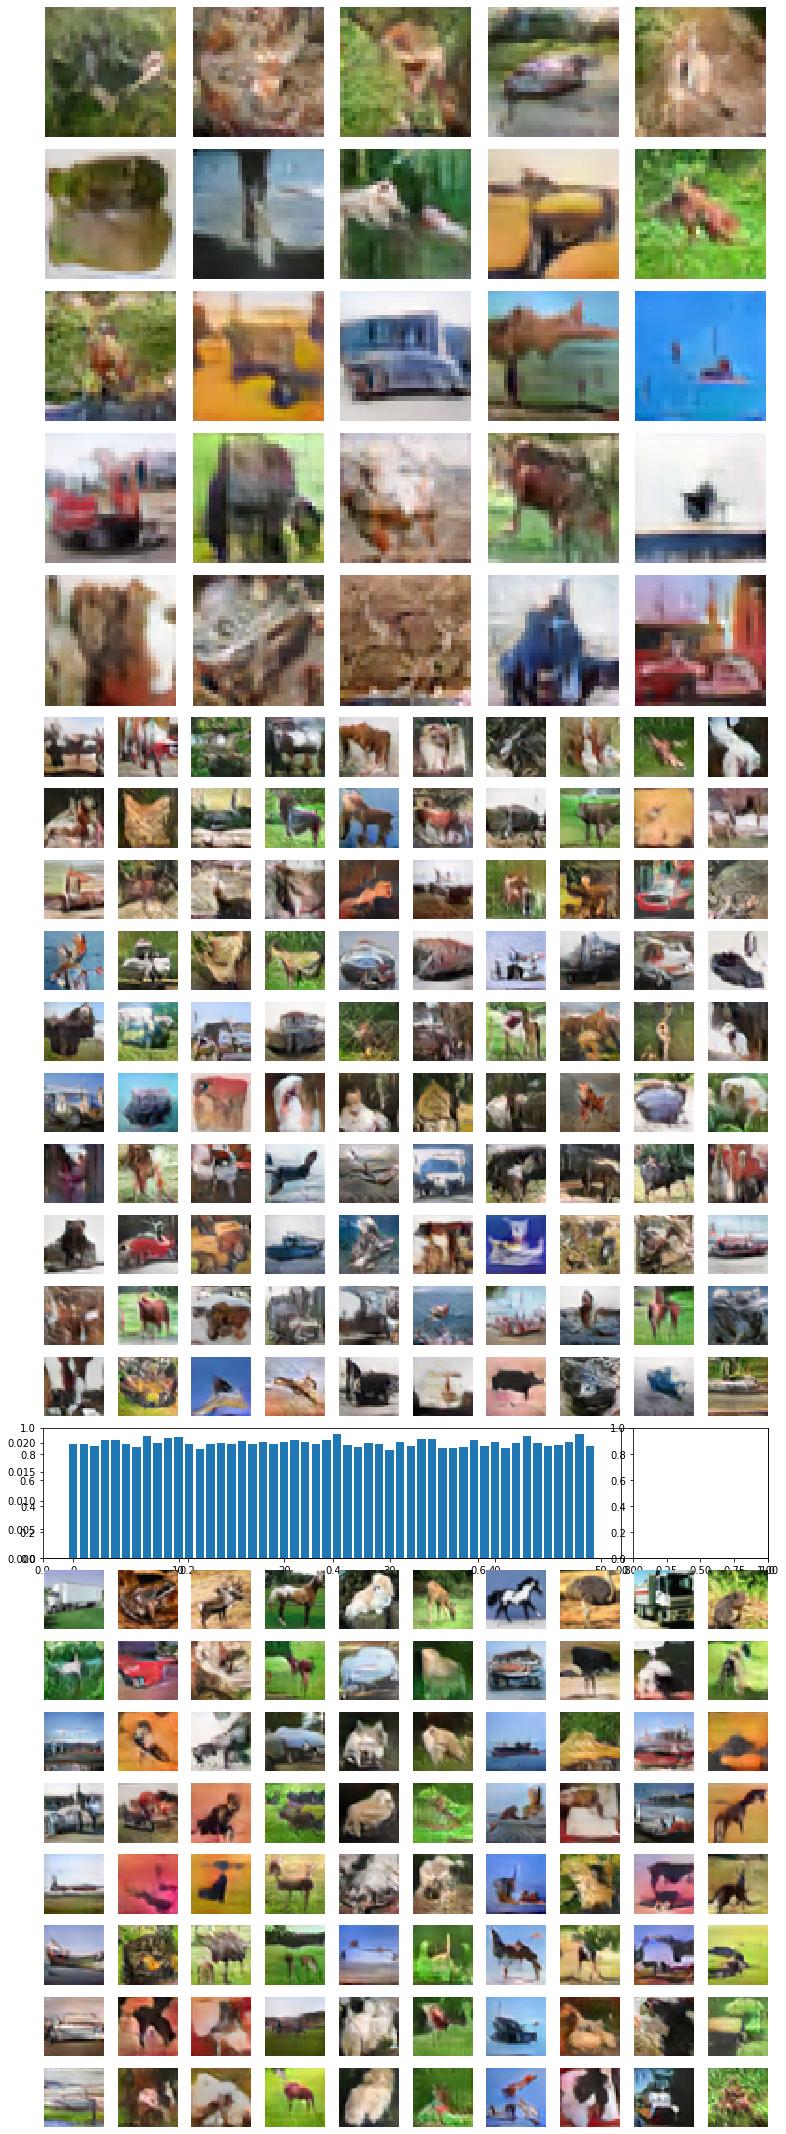

In [4]:
experiment.visualize(save=False)

In [ ]:
import matplotlib.pyplot as plt
imgs = experiment.trainer.gen.xsim.eval()
plt.imshow(imgs[0, ...])

In [ ]:
#test

In [5]:
do_scale = True
x_sim = experiment.trainer.gen.xsim
if do_scale:
    x_sim = (x_sim*127.5)+127.5
results_1 = acgan.evaluate.inception_score.inception_score(x_sim, scale=do_scale, max_eval=50000)
print(results_1)

100%|█████████▉| 49984/50000 [03:12<00:00, 259.52it/s]


(5.8907404, 0.07403448)


In [6]:
do_scale = False
x_sim = experiment.trainer.gen.xsim
if do_scale:
    x_sim = (x_sim*127.5)+127.5
results_1 = acgan.evaluate.inception_score.inception_score(x_sim, scale=do_scale, max_eval=50000)
print(results_1)

100%|█████████▉| 49984/50000 [03:11<00:00, 260.47it/s]


(5.896711, 0.06336573)


# using tf gan

In [8]:
import tqdm
import numpy as np
import tensorflow as tf
import tensorflow_gan as tfgan
import matplotlib.pyplot as plt
from acgan.benchmark.metrics import InceptionScore, tensor_to_generator


In [9]:
inception = InceptionScore()
x_sim = experiment.trainer.gen.xsim
x_norm = tf.image.resize(x_sim, (299, 299))
output = inception.run(x_norm, max_eval=50000)
print(output)

  0%|          | 0/50000 [00:00<?, ?it/s]

Instructions for updating:
Use keras.layers.flatten instead.


Instructions for updating:
Use keras.layers.flatten instead.


Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:
Please use `layer.__call__` method instead.



50016it [03:11, 260.91it/s]                           


(6.1487904, 0.07913233)
